In [4]:
%load_ext Cython
import sklearn_tda as tda
import matplotlib.pyplot as plt
import numpy as np
from sklearn.kernel_approximation import RBFSampler


The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython
Cython not found--SlicedWassersteinKernel, PersistenceWeightedGaussianKernel and PersistenceScaleSpaceKernel not available
Cython not found--WassersteinDistance and SlicedWassersteinDistance not available
Gudhi not found--GraphInducedComplex not available


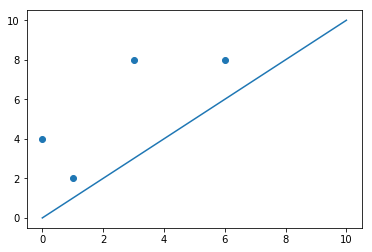

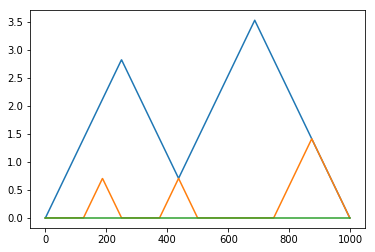

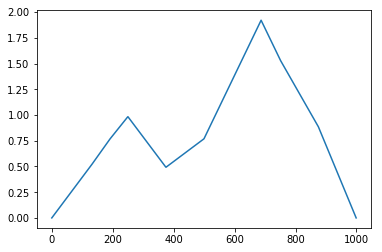

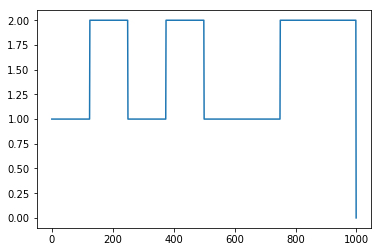

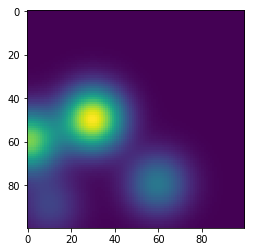

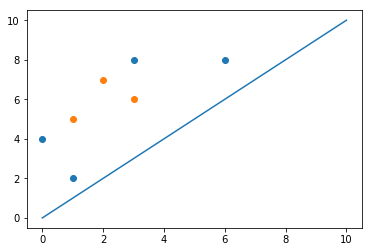

UsageError: Line magic function `%%cython` not found.


In [5]:

D = np.array([[0.0,4.0],[1.0,2.0],[3.0,8.0],[6.0,8.0]])
plt.scatter(D[:,0],D[:,1])
plt.plot([0.0,10.0],[0.0,10.0])
plt.show()

diags = [D]

LS = tda.Landscape(resolution = 1000)
L = LS.fit_transform(diags)
plt.plot(L[0][:1000])
plt.plot(L[0][1000:2000])
plt.plot(L[0][2000:3000])
plt.show()

def pow(n):
  return lambda x: np.power(x[1]-x[0],n)

SH = tda.Silhouette(resolution=1000, weight=pow(2))
sh = SH.fit_transform(diags)
plt.plot(sh[0])
plt.show()

BC = tda.BettiCurve(resolution=1000)
bc = BC.fit_transform(diags)
plt.plot(bc[0])
plt.show()

# CP = tda.ComplexPolynomial(threshold=-1, F="T")
# cp = CP.fit_transform(diags)
# print(cp[0,:])

# TV = tda.TopologicalVector(threshold=-1)
# tv = TV.fit_transform(diags)
# print(tv[0,:])

diagsT = tda.DiagramPreprocessor(use=True, scaler=tda.BirthPersistenceTransform()).fit_transform(diags)
PI = tda.PersistenceImage(bandwidth=1.0, weight=lambda x: x[1], im_range=[0,10,0,10], resolution=[100,100])
pi = PI.fit_transform(diagsT)
plt.imshow(np.flip(np.reshape(pi[0], [100,100]), 0))
plt.show()

plt.scatter(D[:,0],D[:,1])
D = np.array([[1.0,5.0],[3.0,6.0],[2.0,7.0]])
plt.scatter(D[:,0],D[:,1])
plt.plot([0.0,10.0],[0.0,10.0])
plt.show()

diags2 = [D]
# diags = diags[0]

def arctan(C,p):
  return lambda x: C*np.arctan(np.power(x[1], p))

%%cython
PWG = tda.PersistenceWeightedGaussianKernel(bandwidth=1., weight=arctan(1.,1.))
X = PWG.fit(diags)
Y = PWG.transform(diags2)
print("PWG kernel is " + str(Y[0][0]))

PWG = tda.PersistenceWeightedGaussianKernel(kernel_approx=RBFSampler(gamma=1./2, n_components=100000).fit(np.ones([1,2])), weight=arctan(1.,1.))
X = PWG.fit(diags)
Y = PWG.transform(diags2)
print("Approximate PWG kernel is " + str(Y[0][0]))

PSS = tda.PersistenceScaleSpaceKernel(bandwidth=1.)
X = PSS.fit(diags)
Y = PSS.transform(diags2)
print("PSS kernel is " + str(Y[0][0]))

PSS = tda.PersistenceScaleSpaceKernel(kernel_approx=RBFSampler(gamma=1./2, n_components=100000).fit(np.ones([1,2])))
X = PSS.fit(diags)
Y = PSS.transform(diags2)
print("Approximate PSS kernel is " + str(Y[0][0]))

sW = tda.SlicedWassersteinDistance(num_directions=100)
X = sW.fit(diags)
Y = sW.transform(diags2)
print("SW distance is " + str(Y[0][0]))

SW = tda.SlicedWassersteinKernel(num_directions=100, bandwidth=1.)
X = SW.fit(diags)
Y = SW.transform(diags2)
print("SW kernel is " + str(Y[0][0]))

W = tda.WassersteinDistance(wasserstein=1, delta=.001)
X = W.fit(diags)
Y = W.transform(diags2)
print("1-Wasserstein distance is " + str(Y[0][0]))

PF = tda.PersistenceFisherKernel(bandwidth_fisher=1., bandwidth=1.)
X = PF.fit(diags)
Y = PF.transform(diags2)
print("PF kernel is " + str(Y[0][0]))

PF = tda.PersistenceFisherKernel(bandwidth_fisher=1., bandwidth=1., kernel_approx=RBFSampler(gamma=1./2, n_components=100000).fit(np.ones([1,2])))
X = PF.fit(diags)
Y = PF.transform(diags2)
print("Approximate PF kernel is " + str(Y[0][0]))